In [2]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.observatory

import pint.logging
from pint.models import (
    parameter as p,
)

pint.logging.setup(level="INFO")

2

In [3]:
def plot_resids(m,t_all):
    rs = Residuals(t_all, m).phase_resids
    xt = t_all.get_mjds()
    plt.figure()
    plt.plot(xt, rs, "x")
    plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
    plt.xlabel("MJD")
    plt.ylabel("Residual (phase)")
    plt.grid()

In [4]:
def calc(parfile,timfile):
    m, t_all = get_model_and_toas(parfile, timfile)
    #plot_resids(m,t_all)
    print(((3.*m.F1.value**2)/m.F0.value))
    f2 = p.prefixParameter(
    parameter_type="float",
    name="F2",
    value=0.0,
    units=u.Hz / (u.s) ** 2,
    longdouble=True,
    )
    m.components["Spindown"].add_param(f2, setup=True)
    
    m.F2.quantity = ((3.*(m.F1.value**2))/m.F0.value) * u.Hz / u.s**2
    m.F2.frozen= False
    m.validate()
    
    f = pint.fitter.WLSFitter(t_all, m)
    f.fit_toas(maxiter=100,debug=True)
        
        

    print("USING",parfile,"and", timfile)
    print("NToA:",len(t_all))
    print("n from F2:",f.model.F0.value*f.model.F2.value/(f.model.F1.value)**2)
    f.print_summary()
    return f

In [5]:
most = pint.observatory.Observatory.get("most")
most

TopoObs('most' ('e','mo') at [-4483311.64 m, 2648815.92 m -3671909.31 m]:
The Molonglo Observatory Synthesis Telescope (MOST)
Origin of this data is unknown but as of 2021 June 8 this value agrees exactly with
the value used by TEMPO2.
)

In [6]:
def calc2(parfile,timfile):
    m, t_all = get_model_and_toas(parfile, timfile)
    #plot_resids(m,t_all)
    print(((3.*m.F1.value**2)/m.F0.value))
    f2 = p.prefixParameter(
    parameter_type="float",
    name="F2",
    value=0.0,
    units=u.Hz / (u.s) ** 2,
    longdouble=True,
    )
    m.components["Spindown"].add_param(f2, setup=True)
    
    m.F2.quantity = ((3.*(m.F1.value**2))/m.F0.value) * u.Hz / u.s**2
    m.F2.frozen= False
    m.validate()
    
    f = pint.fitter.WLSFitter(t_all, m)
    f.fit_toas(maxiter=100,debug=True)
    most = pint.observatory.Observatory.get("most")
        
        

    print("USING",parfile,"and", timfile)
    print("NToA:",len(t_all))
    print("n from F2:",f.model.F0.value*f.model.F2.value/(f.model.F1.value)**2)
    f.print_summary()
    return f

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.914529'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.77189'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory.global_clock_corrections): File index.txt to be downloaded due to download policy if_expired: https://raw.githubusercontent.com/ipta/pulsar-clock-corrections/main/index.txt
INFO     (pint.observatory        

2.387727606936349e-30
USING J1534-5334.par and J1534-5334.tim
NToA: 231
n from F2: 831.8602188243799
Fitted model using weighted_least_square method with 5 free parameters to 231 TOAs
Prefit residuals Wrms = 247.54093913367777 us, Postfit residuals Wrms = 245.38080251109227 us
Chisq = 364.936 for 225 d.o.f. for reduced Chisq of 1.622

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1534-5334 J1534-5334                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57160.6                      57160.6 d 
FINISH                        58454                        58454 d 
DILATEFREQ                        N                              None
DMDATA                            N

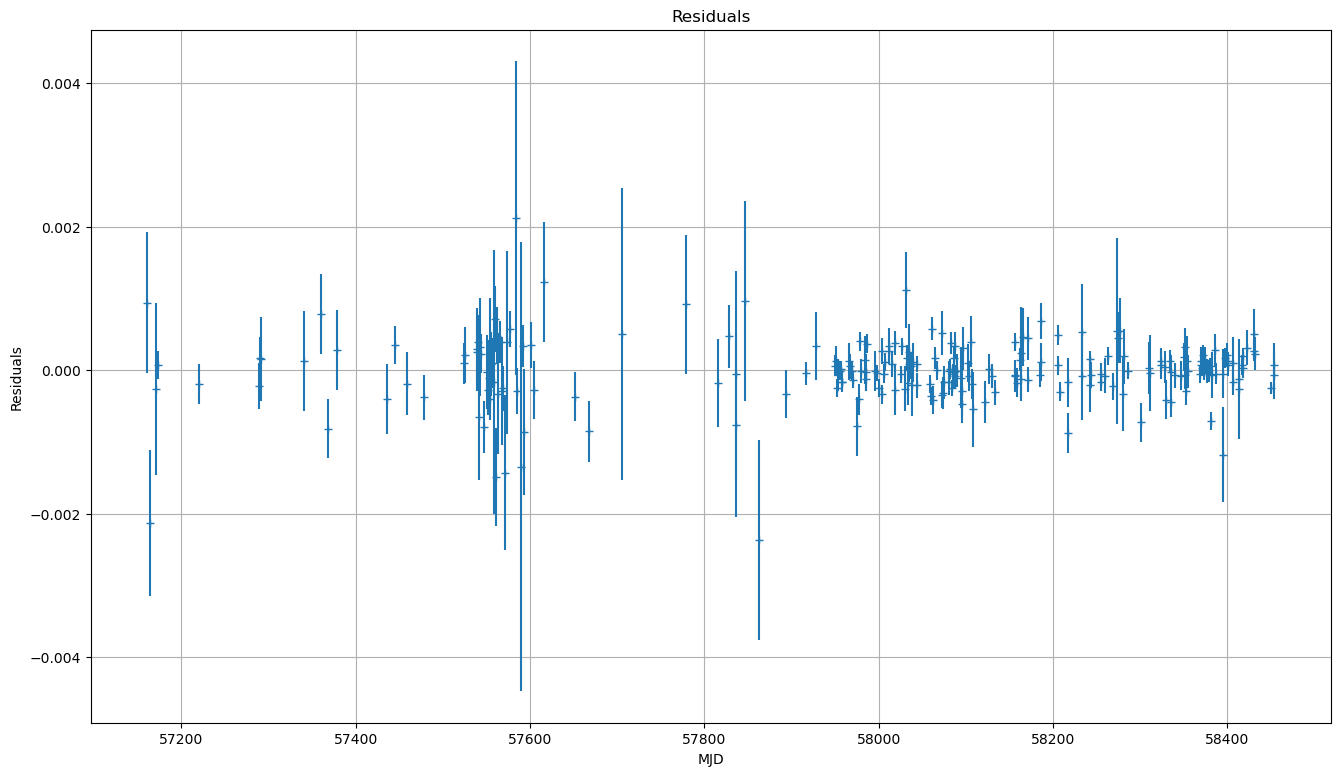

In [8]:
parfile= "J1534-5334.par"
timfile= "J1534-5334.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 1.19615'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.55612'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\observatory\clock_file.py:176 UserWarning: Data points out of range in clock file 'mo2gps.clk'


2.9838284347269067e-24
USING J1105-6107.par and J1105-6107.tim
NToA: 145
n from F2: -35.99099310032987
Fitted model using weighted_least_square method with 5 free parameters to 145 TOAs
Prefit residuals Wrms = 518054.7726500991 us, Postfit residuals Wrms = 2307.190123624221 us
Chisq = 8715.442 for 139 d.o.f. for reduced Chisq of 62.701

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1105-6107 J1105-6107                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57360.8                      57360.8 d 
FINISH                      58422.9                      58422.9 d 
DILATEFREQ                       

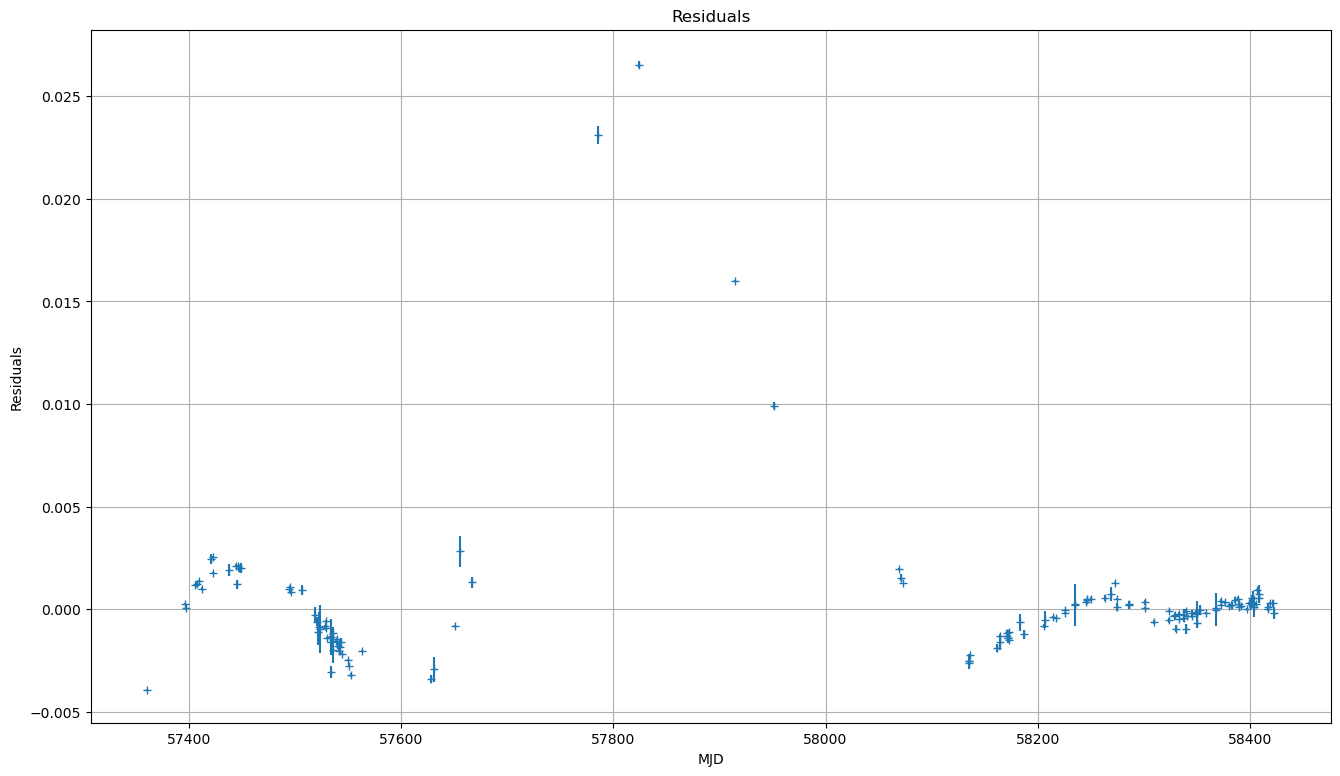

In [9]:
parfile= "J1105-6107.par"
timfile= "J1105-6107.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.932668'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.37633'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False
INFO     (pint.observatory              ): Using global clock file for mo2gps.clk with bogus_last_correction=True
INFO

2.4071025540908616e-23
USING J1709-4429.par and J1709-4429.tim
NToA: 114
n from F2: 27.959276143112863
Fitted model using weighted_least_square method with 10 free parameters to 114 TOAs
Prefit residuals Wrms = 186176.37319137316 us, Postfit residuals Wrms = 856.933962106222 us
Chisq = 1998.293 for 103 d.o.f. for reduced Chisq of 19.401

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                      58418.2 d 
DILATEFREQ                      

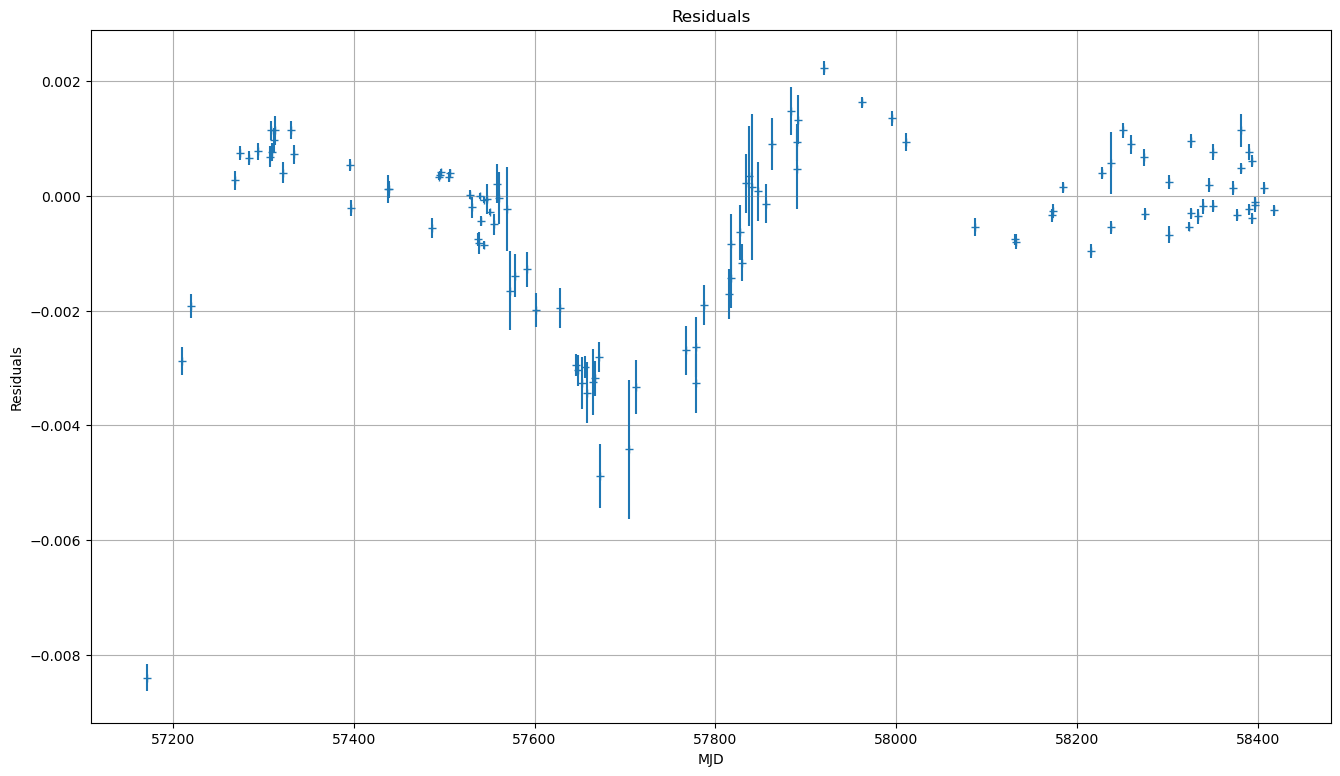

In [7]:
parfile= "J1709-4429.par"
timfile= "J1709-4429.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 21.4766'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.33962'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


1.8263444342894394e-25
USING J0742-2822.par and J0742-2822.tim
NToA: 180
n from F2: -429.88143518555853
Fitted model using weighted_least_square method with 5 free parameters to 180 TOAs
Prefit residuals Wrms = 530039.820430903 us, Postfit residuals Wrms = 1888.4109039987281 us
Chisq = 150239.554 for 174 d.o.f. for reduced Chisq of 863.446

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0742-2822 J0742-2822                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57183.2                      57183.2 d 
FINISH                      58414.8                      58414.8 d 
DILATEFREQ                   

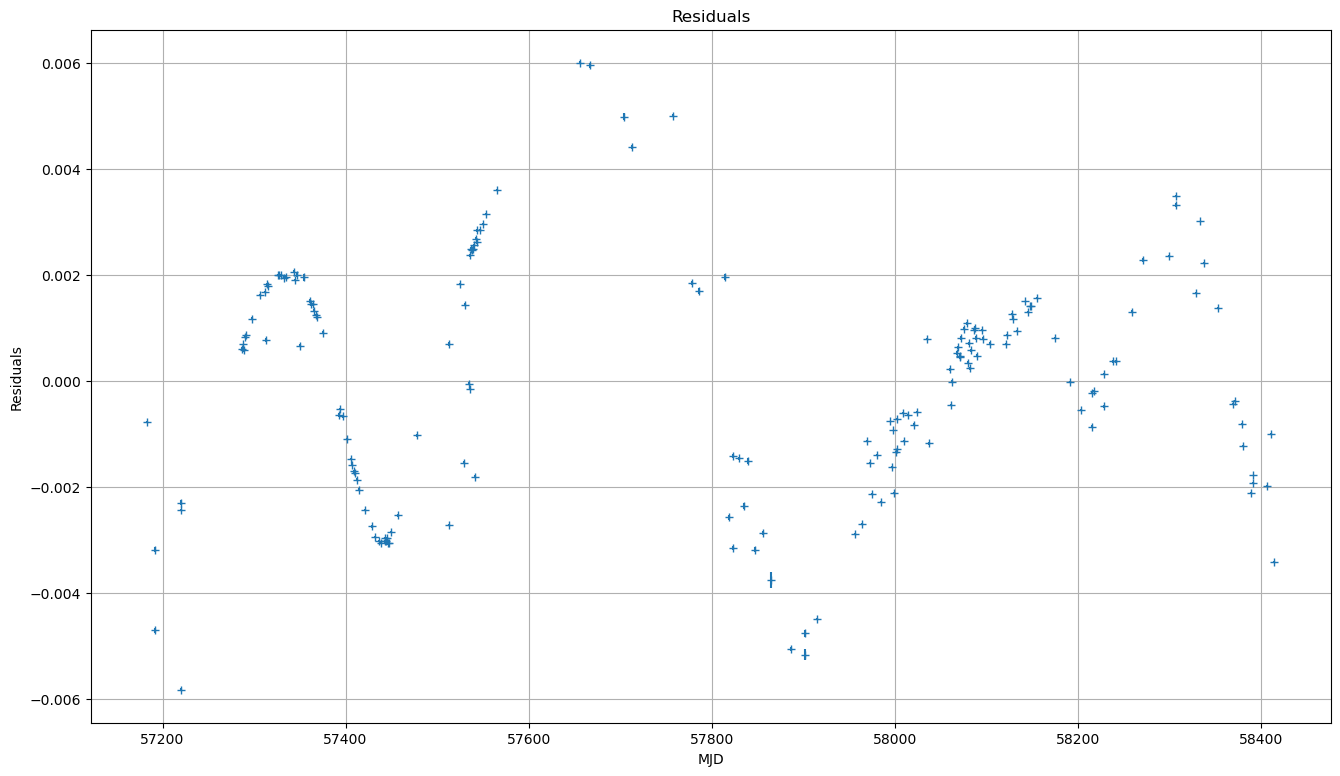

In [35]:
parfile= "J0742-2822.par"
timfile= "J0742-2822.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 1.34321'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -6.98425'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


5.621911370405089e-25
USING J0908-4913.par and J0908-4913.tim
NToA: 173
n from F2: 161.99920008154882
Fitted model using weighted_least_square method with 5 free parameters to 173 TOAs
Prefit residuals Wrms = 33962.01462382951 us, Postfit residuals Wrms = 26846.838749571983 us
Chisq = 39473874.303 for 167 d.o.f. for reduced Chisq of 236370.505

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0908-4913 J0908-4913                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.3                      57171.3 d 
FINISH                      58409.9                      58409.9 d 
DILATEFREQ                        N                              None
DMDATA                   

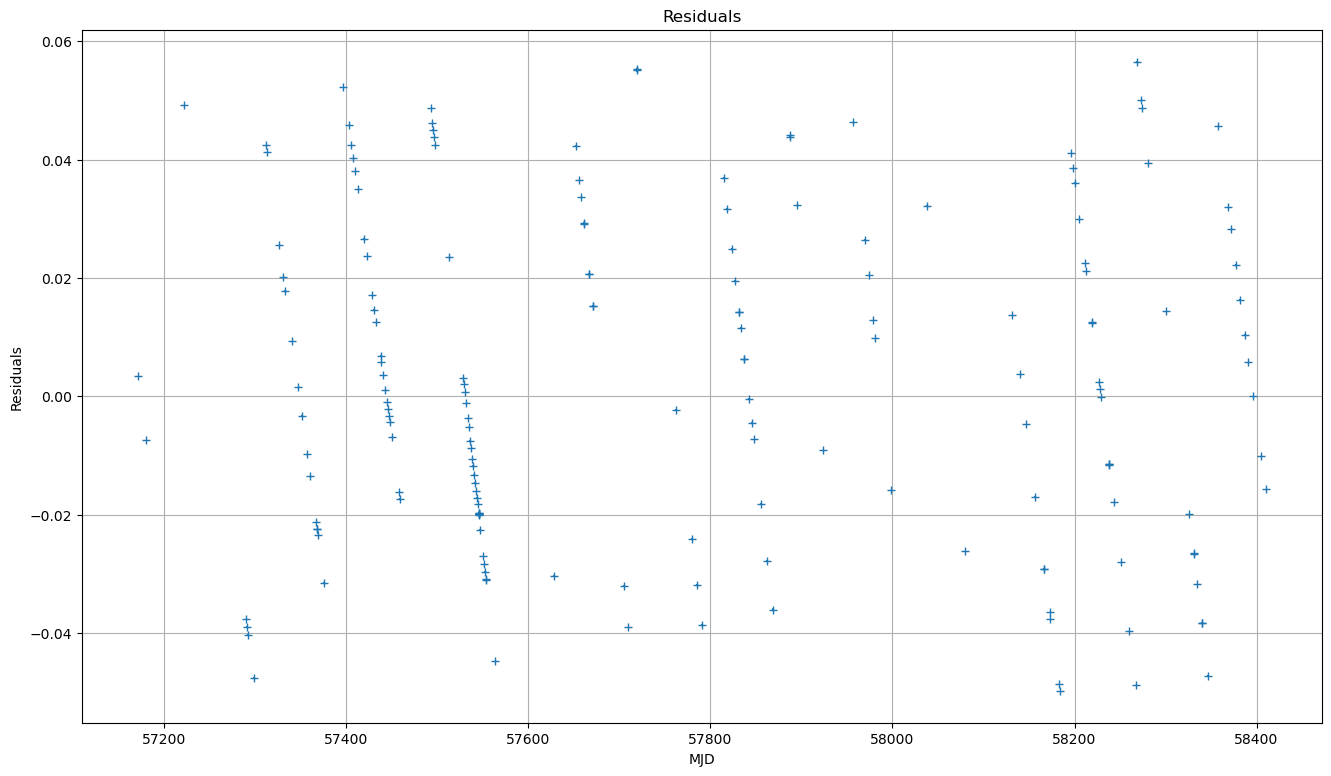

In [36]:
parfile= "J0908-4913.par"
timfile= "J0908-4913.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 1.1366'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.98387'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


1.4608218003224455e-23
USING J1048-5832.par and J1048-5832.tim
NToA: 232
n from F2: 39.33654466344656
Fitted model using weighted_least_square method with 5 free parameters to 232 TOAs
Prefit residuals Wrms = 310421.5466715817 us, Postfit residuals Wrms = 10755.786416879273 us
Chisq = 55756.398 for 226 d.o.f. for reduced Chisq of 246.710

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1048-5832 J1048-5832                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57191.4                      57191.4 d 
FINISH                      58415.9                      58415.9 d 
DILATEFREQ                     

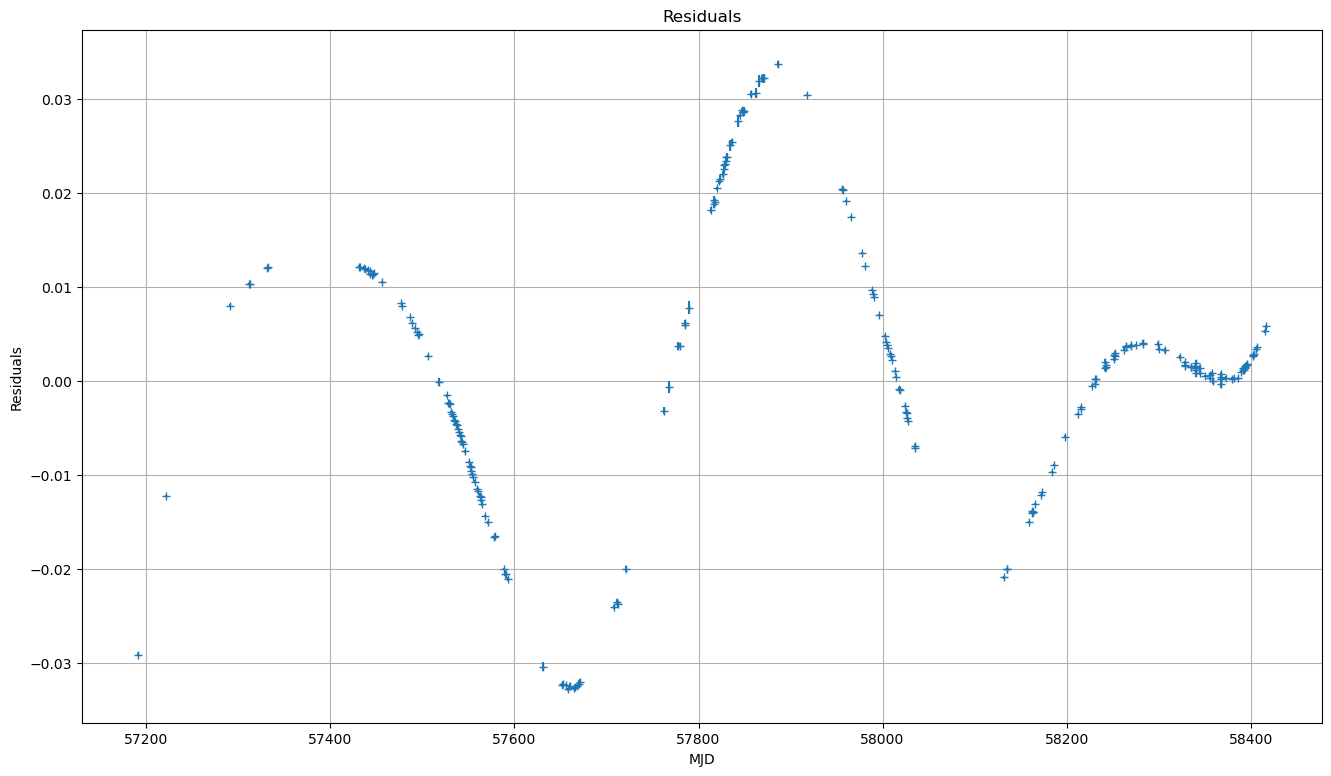

In [37]:
parfile= "J1048-5832.par"
timfile= "J1048-5832.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


1.4608218003224455e-23
USING J1048-5832.par and J1048-5832.tim
NToA: 232
n from F2: 39.33654466344656
Fitted model using weighted_least_square method with 5 free parameters to 232 TOAs
Prefit residuals Wrms = 310421.5466715817 us, Postfit residuals Wrms = 10755.786416879273 us
Chisq = 55756.398 for 226 d.o.f. for reduced Chisq of 246.710

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1048-5832 J1048-5832                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57191.4                      57191.4 d 
FINISH                      58415.9                      58415.9 d 
DILATEFREQ                     

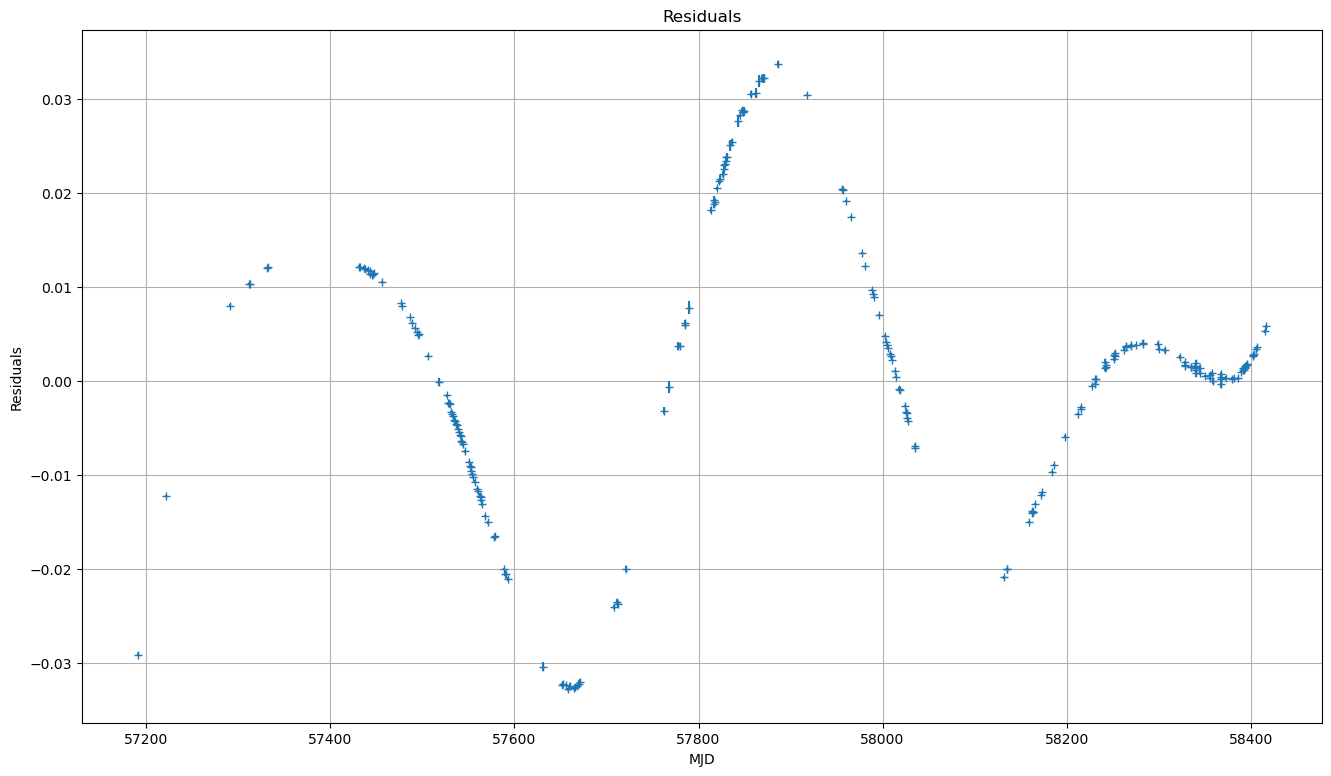

In [38]:
parfile= "J1048-5832.par"
timfile= "J1048-5832.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 1.25986'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -4.20755'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


1.334100986191045e-26
USING J1057-5226.par and J1057-5226.tim
NToA: 126
n from F2: -2291.1639139511926
Fitted model using weighted_least_square method with 5 free parameters to 126 TOAs
Prefit residuals Wrms = 52110.038600900276 us, Postfit residuals Wrms = 39017.91846425911 us
Chisq = 14336179.754 for 120 d.o.f. for reduced Chisq of 119468.165

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1057-5226 J1057-5226                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57134.4                      57134.4 d 
FINISH                      58422.9                      58422.9 d 
DILATEFREQ                        N                              None
DMDATA                  

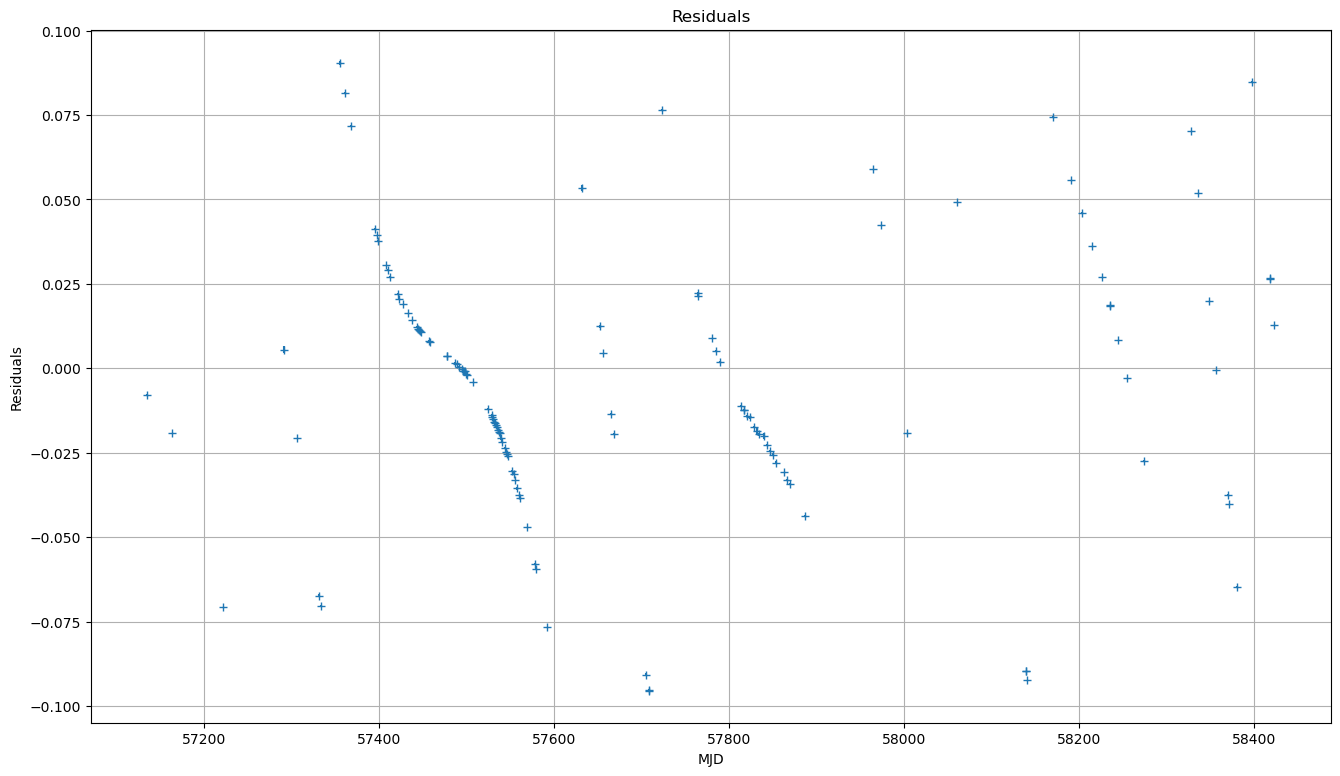

In [39]:
parfile= "J1057-5226.par"
timfile= "J1057-5226.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


2.9838284347269067e-24
USING J1105-6107.par and J1105-6107.tim
NToA: 145
n from F2: -35.99099310032987
Fitted model using weighted_least_square method with 5 free parameters to 145 TOAs
Prefit residuals Wrms = 518054.7726500991 us, Postfit residuals Wrms = 2307.190123624221 us
Chisq = 8715.442 for 139 d.o.f. for reduced Chisq of 62.701

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1105-6107 J1105-6107                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57360.8                      57360.8 d 
FINISH                      58422.9                      58422.9 d 
DILATEFREQ                       

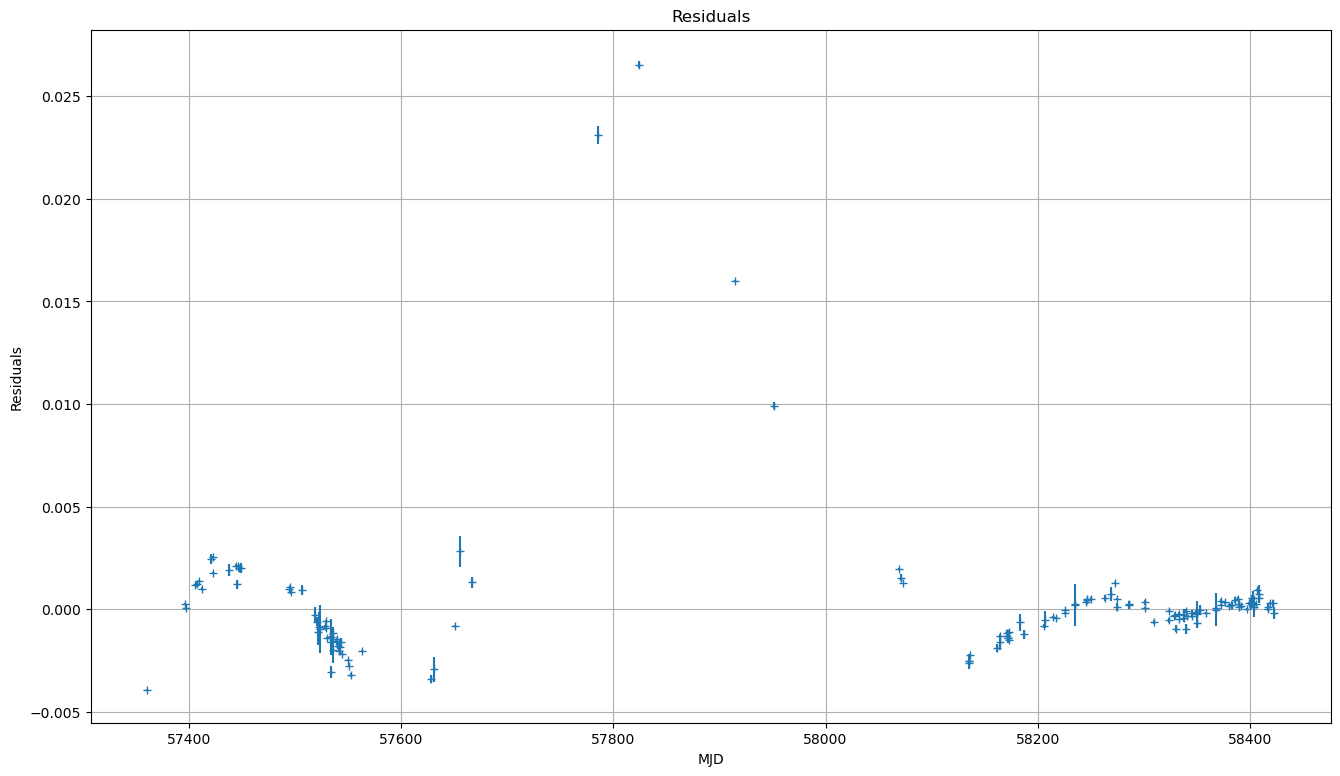

In [40]:
parfile= "J1105-6107.par"
timfile= "J1105-6107.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.864758'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -4.25682'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


7.97162410654402e-28
USING J1253-5820.par and J1253-5820.tim
NToA: 204
n from F2: 1112.4760690092126
Fitted model using weighted_least_square method with 5 free parameters to 204 TOAs
Prefit residuals Wrms = 609.0967975451549 us, Postfit residuals Wrms = 152.1717046296131 us
Chisq = 180.397 for 198 d.o.f. for reduced Chisq of 0.911

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1253-5820 J1253-5820                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57221.2                      57221.2 d 
FINISH                        58427                        58427 d 
DILATEFREQ                        N                              None
DMDATA                            N  

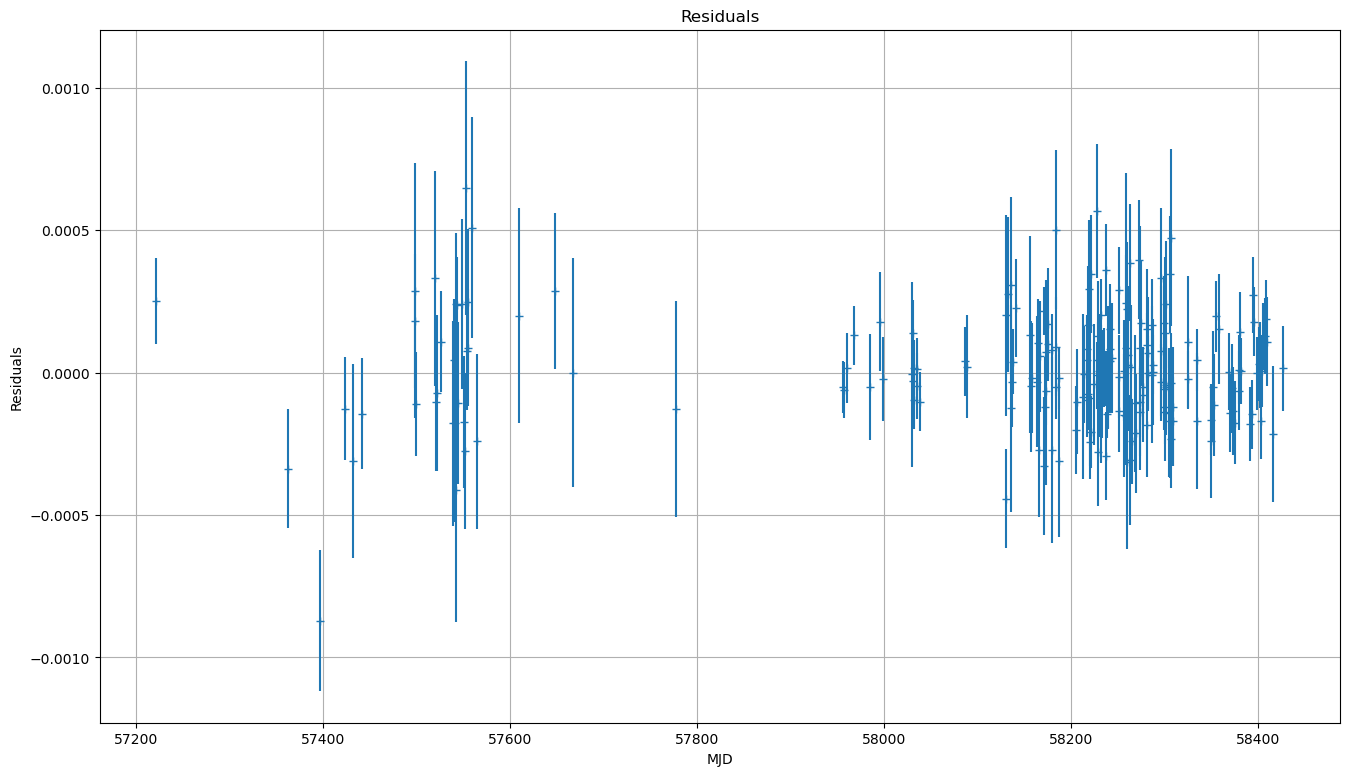

In [41]:
parfile= "J1253-5820.par"
timfile= "J1253-5820.tim"

f=calc(parfile,timfile)
f.plot()

INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


2.387727606936349e-30
USING J1534-5334.par and J1534-5334.tim
NToA: 231
n from F2: 831.8602188243799
Fitted model using weighted_least_square method with 5 free parameters to 231 TOAs
Prefit residuals Wrms = 247.54093913367777 us, Postfit residuals Wrms = 245.38080251109227 us
Chisq = 364.936 for 225 d.o.f. for reduced Chisq of 1.622

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1534-5334 J1534-5334                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57160.6                      57160.6 d 
FINISH                        58454                        58454 d 
DILATEFREQ                        N                              None
DMDATA                            N

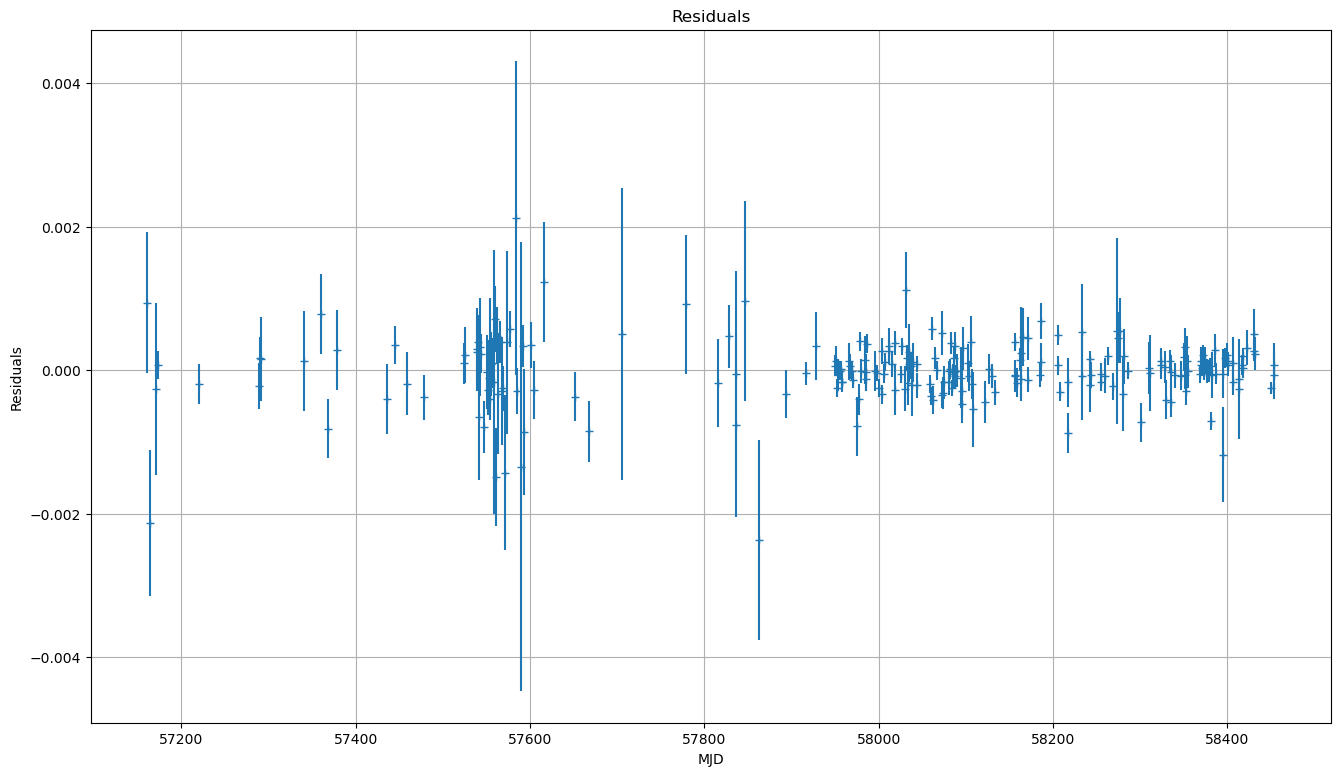

In [42]:
parfile= "J1534-5334.par"
timfile= "J1534-5334.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 1.03058'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -6.90431'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False


1.9186618671168605e-27
USING J1705-1906.par and J1705-1906.tim
NToA: 78
n from F2: 393.0218671661302
Fitted model using weighted_least_square method with 5 free parameters to 78 TOAs
Prefit residuals Wrms = 521.3400424516508 us, Postfit residuals Wrms = 177.9623454644388 us
Chisq = 87.223 for 72 d.o.f. for reduced Chisq of 1.211

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1705-1906 J1705-1906                   None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57170.6                      57170.6 d 
FINISH                      58425.2                      58425.2 d 
DILATEFREQ                        N                              None
DMDATA                            N     

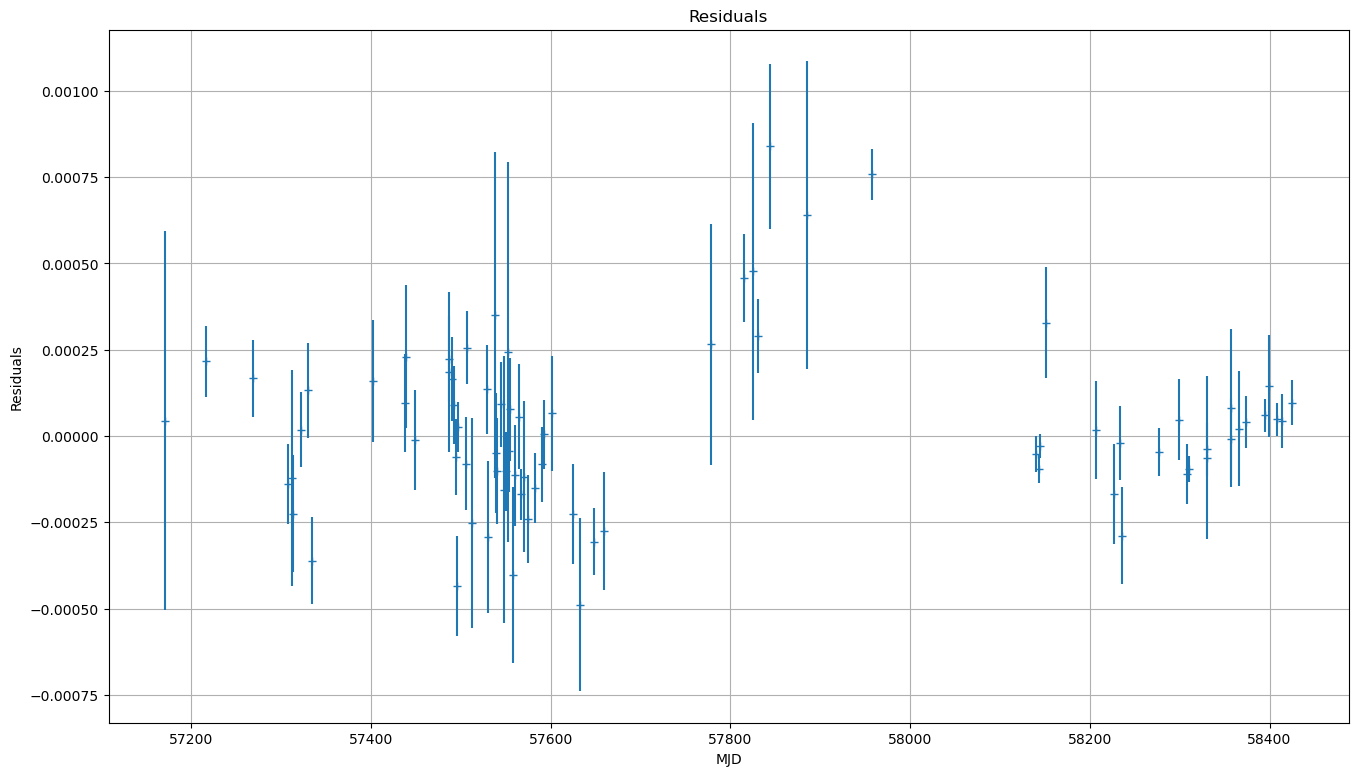

In [43]:
parfile= "J1705-1906.par"
timfile= "J1705-1906.tim"

f=calc(parfile,timfile)
f.plot()

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.932668'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.37633'
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\observatory\clock_file.py:176 UserWarning: Data points out of range in clock file 'mo2gps.clk'


2.4071025540908616e-23
USING J1709-4429.par and J1709-4429.tim
NToA: 114
n from F2: 27.959276143112863
Fitted model using weighted_least_square method with 10 free parameters to 114 TOAs
Prefit residuals Wrms = 186176.37319137316 us, Postfit residuals Wrms = 856.933962106222 us
Chisq = 1998.293 for 103 d.o.f. for reduced Chisq of 19.401

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J1709-4429 J1709-4429                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       57171.6                      57171.6 d 
FINISH                      58393.3                      58418.2 d 
DILATEFREQ                      

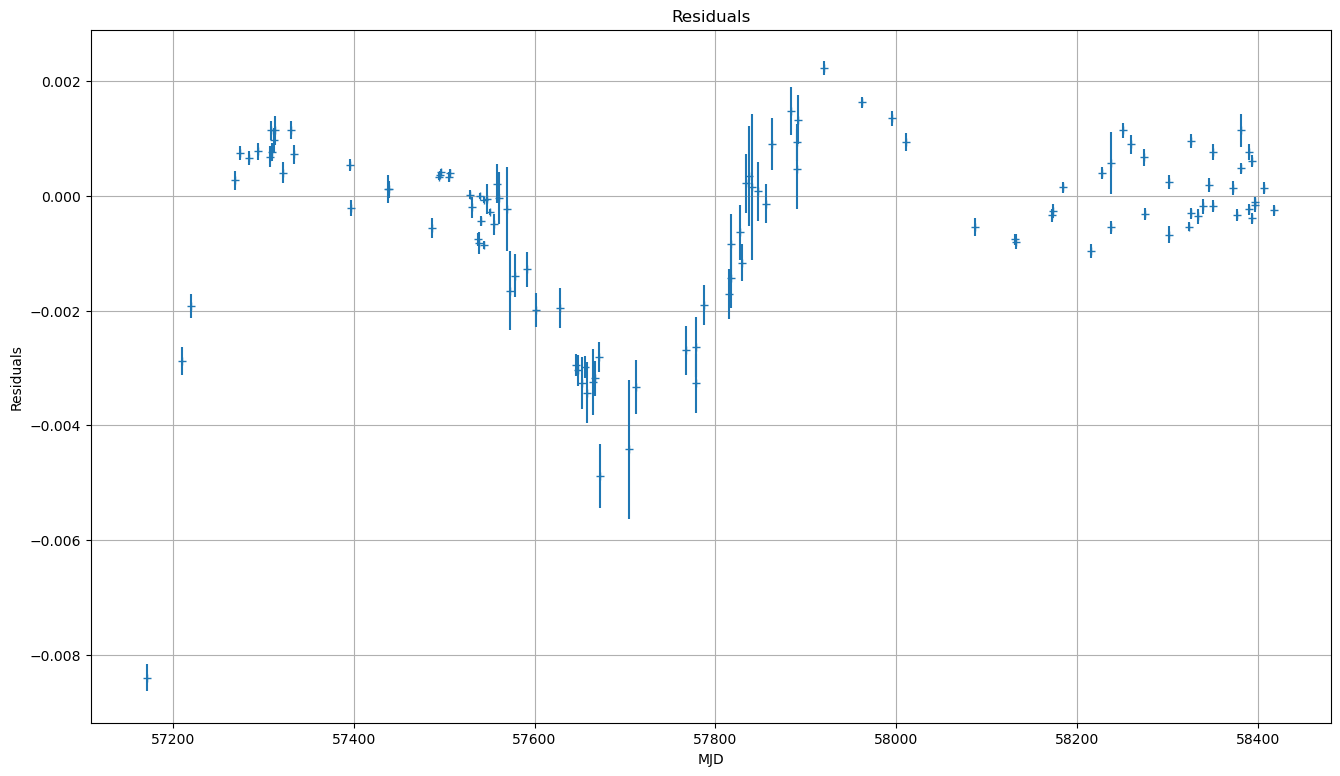

In [44]:
parfile= "J1709-4429.par"
timfile= "J1709-4429.tim"

f=calc(parfile,timfile)
f.plot()